# Initial Data Exploration

In [1]:
import os as os
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import datetime as dt
plt.style.use('ggplot')

% matplotlib inline

# Ideas
- Which medallions survived over the year (nice bar chart)

## Read the data

# <font color='red'>TODO: Adjust to relative path!</font>

In [2]:
taxidata= pd.read_csv('/home/niklas/Documents/jSS16/CEP-Seminar/january13/data_jan13.csv',
                             sep=',')
# try parameter parse_date = True

In [3]:
taxidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14776615 entries, 0 to 14776614
Data columns (total 20 columns):
Unnamed: 0            int64
medallion             int64
hack_license          int64
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
pfare_amount          float64
surcharge             float64
tip_amount            float64
total_amount          float64
dtypes: float64(9), int64(6), object(5)
memory usage: 2.2+ GB


In [4]:
taxidata.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount
0,1,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847,CSH,20.5,0.5,0.00,21.50
1,2,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639,CSH,6.0,0.5,0.00,7.00
2,3,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036,CRD,10.5,0.5,2.20,13.70
3,4,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927,CRD,8.0,0.5,1.70,10.70
4,5,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607,CRD,14.5,0.5,4.65,20.15


Remove the first column

In [5]:
taxidata = taxidata.drop('Unnamed: 0',1)

Check if deleted

In [6]:
taxidata.head(10)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount
0,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847,CSH,20.5,0.5,0.00,21.50
1,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639,CSH,6.0,0.5,0.00,7.00
2,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036,CRD,10.5,0.5,2.20,13.70
3,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927,CRD,8.0,0.5,1.70,10.70
4,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607,CRD,14.5,0.5,4.65,20.15
5,2013000006,2013000006,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:17:00,6,1020,9.77,-73.866135,40.771091,-73.961334,40.764912,CSH,28.5,0.5,0.00,34.30
6,2013000007,2013000007,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:11:00,6,660,1.78,-74.006927,40.740765,-73.982994,40.739616,CRD,9.0,0.5,1.90,11.90
7,2013000008,2013000008,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,CSH,5.0,0.5,0.00,6.00
8,2013000009,2013000009,CMT,1,N,2013-01-01 00:00:00,2013-01-01 00:02:44,1,163,0.50,-73.999878,40.743343,-74.003708,40.748280,CRD,4.0,0.5,1.00,6.00
9,2013000010,2013000010,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:19:00,3,1140,2.81,-73.989845,40.758041,-73.972008,40.757069,CSH,14.5,0.5,0.00,15.50


In [7]:
taxidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14776615 entries, 0 to 14776614
Data columns (total 19 columns):
medallion             int64
hack_license          int64
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
pfare_amount          float64
surcharge             float64
tip_amount            float64
total_amount          float64
dtypes: float64(9), int64(5), object(5)
memory usage: 2.1+ GB


Make the datetimes to datetime-objects

In [8]:
taxidata['pickup_datetime'] =pd.to_datetime(taxidata['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
taxidata['dropoff_datetime'] =pd.to_datetime(taxidata['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [9]:
taxidata.ftypes # is it sparse or dense?

medallion                      int64:dense
hack_license                   int64:dense
vendor_id                     object:dense
rate_code                      int64:dense
store_and_fwd_flag            object:dense
pickup_datetime       datetime64[ns]:dense
dropoff_datetime      datetime64[ns]:dense
passenger_count                int64:dense
trip_time_in_secs              int64:dense
trip_distance                float64:dense
pickup_longitude             float64:dense
pickup_latitude              float64:dense
dropoff_longitude            float64:dense
dropoff_latitude             float64:dense
payment_type                  object:dense
pfare_amount                 float64:dense
surcharge                    float64:dense
tip_amount                   float64:dense
total_amount                 float64:dense
dtype: object

In [10]:
taxidata.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
payment_type                0
pfare_amount                0
surcharge                   0
tip_amount                  0
total_amount                0
dtype: int64

Really? Max passenger count is 255?

In [11]:
taxidata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
medallion,14776615.0,2.013006e+09,3665.679508,2.013000e+09,2.013003e+09,2.013006e+09,2.013009e+09,2.013013e+09
hack_license,14776615.0,2.013014e+09,8540.493790,2.013000e+09,2.013007e+09,2.013014e+09,2.013021e+09,2.013032e+09
rate_code,14776615.0,1.034273e+00,0.338771,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+02
passenger_count,14776615.0,1.697372e+00,1.365396,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.550000e+02
trip_time_in_secs,14776615.0,6.834236e+02,494.406260,0.000000e+00,3.600000e+02,5.540000e+02,8.850000e+02,1.080000e+04
trip_distance,14776615.0,2.770976e+00,3.305923,0.000000e+00,1.000000e+00,1.700000e+00,3.060000e+00,1.000000e+02
pickup_longitude,14776615.0,-7.263634e+01,10.138193,-2.771285e+03,-7.399188e+01,-7.398166e+01,-7.396684e+01,1.124042e+02
pickup_latitude,14776615.0,4.001440e+01,7.789904,-3.547921e+03,4.073551e+01,4.075315e+01,4.076729e+01,3.310365e+03
dropoff_longitude,14776529.0,-7.259443e+01,10.288603,-2.350956e+03,-7.399121e+01,-7.398013e+01,-7.396390e+01,2.228738e+03
dropoff_latitude,14776529.0,3.999219e+01,7.537067,-3.547921e+03,4.073468e+01,4.075362e+01,4.076819e+01,3.477106e+03


In [12]:
no_of_zeros = (taxidata==0).astype(int).sum() # awesome, awesome, AWESOME!!! :-)

Count zeros and view percentage of zeros

In [13]:
no_of_zeros

medallion                   0
hack_license                0
vendor_id                   0
rate_code                 667
store_and_fwd_flag          0
pickup_datetime             0
dropoff_datetime            0
passenger_count           166
trip_time_in_secs       34185
trip_distance           83376
pickup_longitude       267494
pickup_latitude        265104
dropoff_longitude      275657
dropoff_latitude       273357
payment_type                0
pfare_amount                0
surcharge             7596039
tip_amount            7236560
total_amount                0
dtype: int64

In [14]:
no_of_zeros.apply(lambda x: x/taxidata.medallion.count()) 

medallion             0.000000
hack_license          0.000000
vendor_id             0.000000
rate_code             0.000045
store_and_fwd_flag    0.000000
pickup_datetime       0.000000
dropoff_datetime      0.000000
passenger_count       0.000011
trip_time_in_secs     0.002313
trip_distance         0.005642
pickup_longitude      0.018103
pickup_latitude       0.017941
dropoff_longitude     0.018655
dropoff_latitude      0.018499
payment_type          0.000000
pfare_amount          0.000000
surcharge             0.514058
tip_amount            0.489731
total_amount          0.000000
dtype: float64

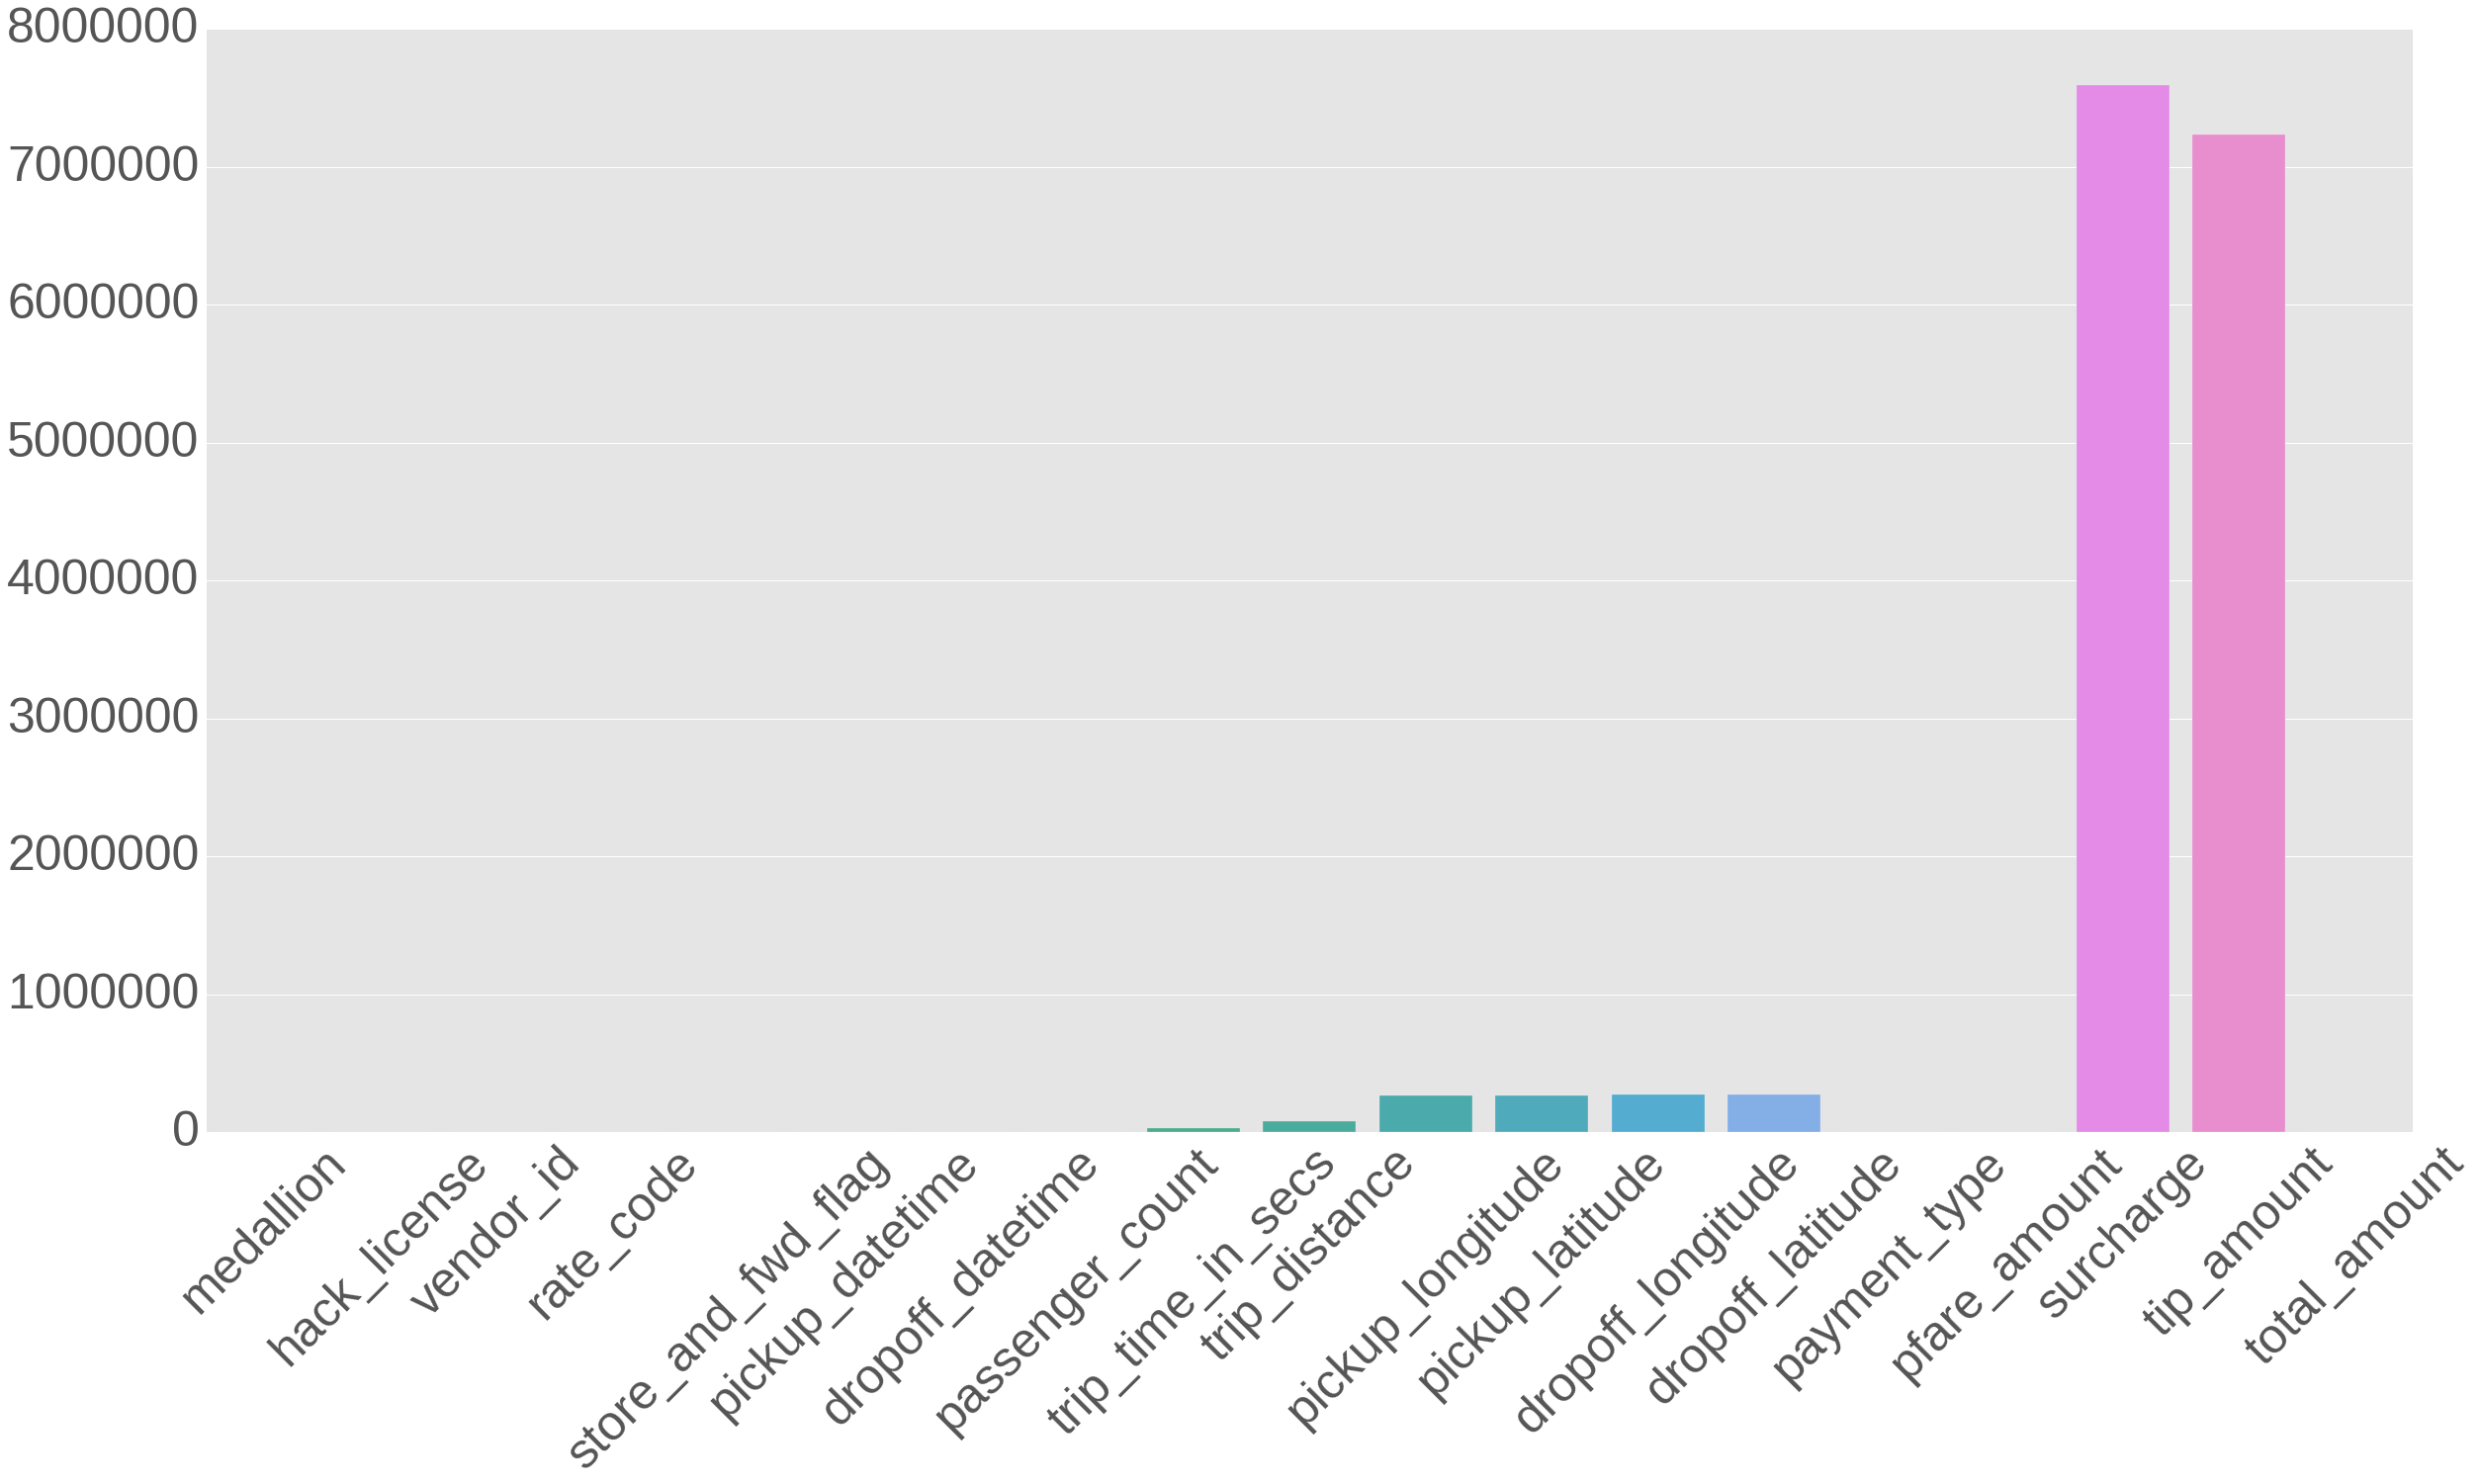

In [25]:
plt.figure(figsize=(40,20))
sns.set_context('notebook',font_scale=5)
seaplot = sns.barplot(no_of_zeros.keys(), no_of_zeros.values) # only proof of concept
seaplot.set_xticklabels(seaplot.get_xticklabels(), rotation=45)

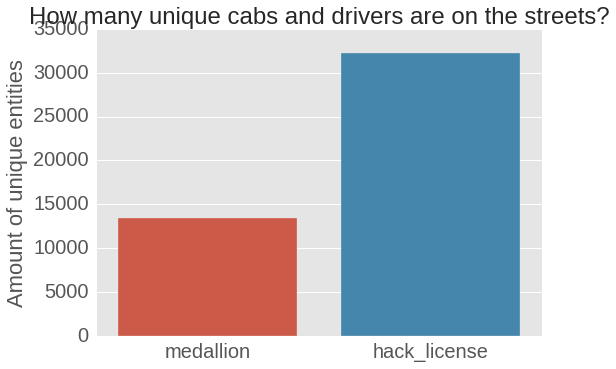

In [27]:
#plt.bar(taxidata.medallion.value_counts, height=1)
# plt.bar(np.arange(2) ,(len(pd.unique(taxidata.medallion)), len(pd.unique(taxidata.hack_license)))) # works
# plt.xticks('medallion', 'hack_licenses')
sns.set_context('notebook',font_scale=2)
sns.barplot(y=[len(pd.unique(taxidata.medallion)), len(pd.unique(taxidata.hack_license))], 
            x=['medallion', 'hack_license'])
plt.ylabel('Amount of unique entities')
plt.title('How many unique cabs and drivers are on the streets?')

Generate new feature 'trip_duration' to compare it to the recorded 'trip_time_in_secs'

In [28]:
taxidata['trip_duration'] = taxidata['dropoff_datetime'] - taxidata['pickup_datetime']

In [29]:
taxidata.trip_duration.head()

0   00:28:00
1   00:06:00
2   00:10:00
3   00:08:00
4   00:16:00
Name: trip_duration, dtype: timedelta64[ns]

In [31]:
medallion_grouped = taxidata.groupby('medallion')

In Python 3, keys() return a Dictionary view object which does not support indexing. Therefore you need to apply a list() Wrapper around it

In [32]:
list(medallion_grouped.groups.keys())[:10] # Apply list wrapper, view first 10 entries

[2013003776,
 2013003777,
 2013003778,
 2013003779,
 2013003780,
 2013003781,
 2013003782,
 2013003783,
 2013003784,
 2013003785]

In [33]:
list(medallion_grouped.groups.keys())[-10:-1]  # last 10 entries

[2013003766,
 2013003767,
 2013003768,
 2013003769,
 2013003770,
 2013003771,
 2013003772,
 2013003773,
 2013003774]

In [34]:
medallion_grouped.size() # already sorted

medallion
2013000001    1101
2013000002     773
2013000003    1254
2013000004    1278
2013000005     927
2013000006    1351
2013000007    1232
2013000008     782
2013000009     990
2013000010     648
2013000011    1089
2013000012    1480
2013000013    1143
2013000014    1355
2013000015    1029
2013000016    1063
2013000017    1570
2013000018    1555
2013000019    1349
2013000020    1464
2013000021    1129
2013000022     874
2013000023     856
2013000024     324
2013000025     988
2013000026    1289
2013000027    1068
2013000028    1101
2013000029     620
2013000030    1177
              ... 
2013013397       1
2013013398     163
2013013399     510
2013013400     143
2013013401       1
2013013402     172
2013013403     424
2013013404     371
2013013405     108
2013013406       1
2013013407     344
2013013408      26
2013013409       1
2013013410       4
2013013411      72
2013013412     279
2013013413       1
2013013414       9
2013013415       1
2013013416      55
2013013417      47
20

In [35]:
medallion_grouped.size().describe()

count    13426.000000
mean      1100.596976
std        354.170632
min          1.000000
25%        903.000000
50%       1165.000000
75%       1355.000000
max       2137.000000
dtype: float64

In [36]:
#medallion_summary = {}
#for key, value in grouped do
#    medallion_summary[key]= grouped[key].sum()
medallion_grouped.groups[2013013410]
#type(grouped.groups)

[11199676, 11218769, 11224383, 11229246]

In [37]:
taxidata.loc[medallion_grouped.groups[2013013410]]#['trip_distance']

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount,trip_duration
11199676,2013013410,2013031658,VTS,1,NaN,2013-01-24 21:43:00,2013-01-24 22:01:00,1,1080,0.0,0.0,0.0,0.0,0.0,CRD,10.83,0.5,5.00,16.33,00:18:00
11218769,2013013410,2013031658,VTS,1,NaN,2013-01-24 22:16:00,2013-01-24 22:17:00,1,60,0.0,0.0,0.0,0.0,0.0,CSH,3.00,0.5,0.00,3.50,00:01:00
11224383,2013013410,2013031658,VTS,1,NaN,2013-01-24 22:26:00,2013-01-24 22:30:00,1,240,0.0,0.0,0.0,0.0,0.0,CRD,4.08,10.0,5.12,22.20,00:04:00
11229246,2013013410,2013031658,VTS,5,NaN,2013-01-24 22:35:00,2013-01-24 22:36:00,1,60,0.0,0.0,0.0,0.0,0.0,CSH,70.00,0.0,0.00,70.00,00:01:00


The values of the keys contain groups with the row indices that belong to a medallion

In [39]:
medallion_summary = {}
for key, value in medallion_grouped:
    medallion_summary[key]= taxidata.loc[medallion_grouped.groups[key]]['trip_distance'].sum()

The execution above takes a lot of time!

In [40]:
len(medallion_summary)

13426

In [41]:
medallion_summary_list = list(medallion_summary.values())

In [42]:
medsumdf = pd.DataFrame.from_dict(medallion_summary, orient='index')

In [43]:
medsumdf.head()

,0
2013003776,2602.95
2013003777,3493.75
2013003778,3734.81
2013003779,3874.78
2013003780,4275.20


In [44]:
medsumdf.describe()

,0
count,13426.000000
mean,3049.727444
std,867.852796
min,0.000000
25%,2669.185000
50%,3215.000000
75%,3634.037500
max,5391.430000


What we can read right here: The distribution of absolute miles per car in one month.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f85ea56a0>]], dtype=object)

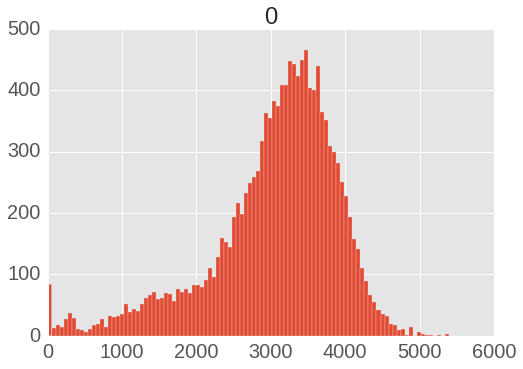

In [45]:
medsumdf.hist(bins=100)

quick and dirty histogram

Get number of drives per medallion.

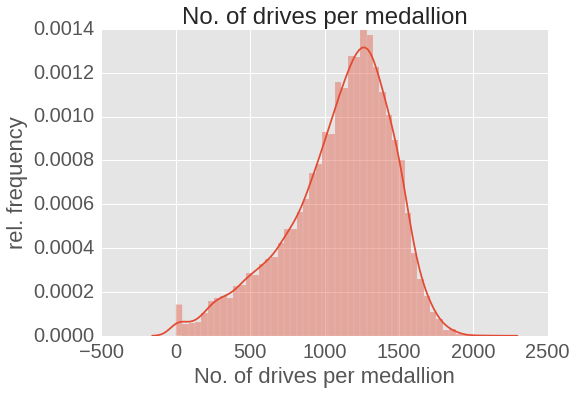

In [46]:
#plt.hist(grouped.size(), bins=100, normed=True)
a = sns.distplot(medallion_grouped.size(), kde=True)#, fit=stats.gamma)
plt.xlabel('No. of drives per medallion')
plt.ylabel('rel. frequency')
plt.title('No. of drives per medallion')

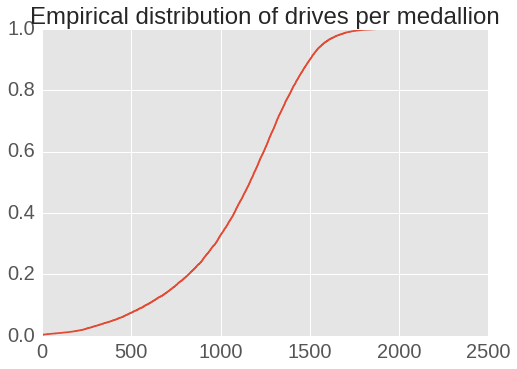

In [47]:
ecdf_medallion = ECDF(medallion_grouped.size())

#x = np.linspace(min(grouped.size()), max(grouped.size()))
plt.plot(ecdf_medallion.x, ecdf_medallion.y)
plt.title('Empirical distribution of drives per medallion')

This histogram describes the amount of rides per medallion.

In [48]:
medallion_grouped.trip_duration.agg(np.sum) # nice one! Need to save memory, therefore do not create a new variable

medallion
2013000001     8 days 22:17:00
2013000002     6 days 15:54:00
2013000003     9 days 19:02:00
2013000004    10 days 03:03:00
2013000005     6 days 19:50:00
2013000006    11 days 15:05:00
2013000007     8 days 14:47:00
2013000008     5 days 23:24:00
2013000009     7 days 11:27:51
2013000010     5 days 10:09:00
2013000011     8 days 23:12:00
2013000012    10 days 19:35:00
2013000013     8 days 06:58:00
2013000014     9 days 19:08:00
2013000015     7 days 15:19:00
2013000016     8 days 06:22:00
2013000017    11 days 02:04:00
2013000018    11 days 20:43:00
2013000019    10 days 18:09:34
2013000020    10 days 16:07:00
2013000021     9 days 09:31:00
2013000022     7 days 21:53:00
2013000023     6 days 23:01:00
2013000024     4 days 14:24:00
2013000025     7 days 16:49:00
2013000026     9 days 23:43:00
2013000027     9 days 02:57:00
2013000028     8 days 09:21:00
2013000029     4 days 19:26:00
2013000030     9 days 03:29:00
                    ...       
2013013397     0 days 00:00:1

In [49]:
print('Min trip_duration: ' + str(min(medallion_grouped.trip_duration.agg(np.sum))))
print('Max trip_duration: ' + str(max(medallion_grouped.trip_duration.agg(np.sum))))

Min trip_duration: -1 days +23:59:42
Max trip_duration: 66 days 09:37:41


There are some entries with negative Values? How is that possible?

In [50]:
# medallion_grouped.describe() # is absolutely too expensive (takes too long) !

At first, convert the timedeltas into other units (e.g. minutes (m) or hours (h)) in order to apply a histogram.

Retrieve first overview about hours of driving

In [51]:
medallion_grouped.trip_duration.agg(np.sum).astype('timedelta64[h]').describe() # use h,m,s for hours, minutes, seconds

count    13426.000000
mean       209.097497
std         59.327220
min         -1.000000
25%        181.000000
50%        221.000000
75%        250.000000
max       1593.000000
Name: trip_duration, dtype: float64

In [52]:
medallion_grouped.trip_duration.describe() # nice stats per medallion

medallion        
2013000001  count                      1101
            mean     0 days 00:11:40.653950
            std      0 days 00:08:08.651138
            min             0 days 00:01:00
            25%             0 days 00:06:00
            50%             0 days 00:10:00
            75%             0 days 00:15:00
            max             0 days 01:11:00
2013000002  count                       773
            mean     0 days 00:12:24.683053
            std      0 days 00:08:39.512833
            min             0 days 00:00:00
            25%             0 days 00:06:00
            50%             0 days 00:10:00
            75%             0 days 00:16:00
            max             0 days 01:01:00
2013000003  count                      1254
            mean     0 days 00:11:14.736842
            std      0 days 00:07:38.391357
            min             0 days 00:00:00
            25%             0 days 00:06:00
            50%             0 days 00:10:00
            75

Make a list of those rows where the trip duration is negative

In [53]:
#taxidata.trip_duration.head()
list_of_neg_timedelta = []
for key, value in taxidata.trip_duration.iteritems():
    if value < dt.timedelta(0):
        list_of_neg_timedelta.append(key)
        

In [54]:
list_of_neg_timedelta
#len(list_of_neg_timedelta)

[895570,
 3911465,
 4043001,
 4065627,
 7850209,
 7971656,
 10478755,
 10506663,
 10733552,
 10806631,
 11259103,
 11260245,
 11265758,
 11271581,
 11273396,
 11273735,
 11274740,
 11413776,
 11414752,
 11415774,
 11416573,
 11450402,
 11470043,
 11489517,
 11517565,
 11629337,
 12748379,
 12754581,
 13030057,
 13094737,
 13114591,
 13199495,
 13200876,
 13201378,
 13202284,
 13440350,
 13926144,
 14286177,
 14304169,
 14385031,
 14405516,
 14406966,
 14419948,
 14427567,
 14429967,
 14473470,
 14530063,
 14564608]

In [55]:
np.savetxt("list_of_neg_timedelta_jan13.csv", list_of_neg_timedelta, delimiter=",", fmt='%s')

In [56]:
taxidata.loc[list_of_neg_timedelta]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount,trip_duration
895570,2013013095,2013009445,CMT,0,N,2013-01-03 09:15:13,2013-01-03 09:15:12,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,9.50,0.0,0.0,9.50,-1 days +23:59:59
3911465,2013013326,2013003946,CMT,0,N,2013-01-10 00:07:45,2013-01-10 00:07:43,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,45.00,0.0,0.0,45.00,-1 days +23:59:58
4043001,2013013334,2013029795,CMT,0,N,2013-01-10 10:21:10,2013-01-10 10:21:09,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,119.85,0.0,0.0,119.85,-1 days +23:59:59
4065627,2013009836,2013020959,CMT,0,N,2013-01-10 11:23:48,2013-01-10 11:23:47,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,14.50,0.5,3.0,18.00,-1 days +23:59:59
7850209,2013013384,2013015450,CMT,0,N,2013-01-18 01:47:23,2013-01-18 01:47:16,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,15.00,0.0,0.0,15.00,-1 days +23:59:53
7971656,2013013385,2013023952,CMT,0,N,2013-01-18 10:06:31,2013-01-18 10:06:27,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,33.00,0.0,7.0,40.50,-1 days +23:59:56
10478755,2013013406,2013030358,CMT,0,N,2013-01-23 15:03:30,2013-01-23 15:03:29,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,24.00,0.0,0.0,24.00,-1 days +23:59:59
10506663,2013002705,2013030061,CMT,0,N,2013-01-23 16:07:26,2013-01-23 16:07:24,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,40.70,0.5,0.0,41.20,-1 days +23:59:58
10733552,2013013389,2013010702,CMT,0,N,2013-01-23 23:48:51,2013-01-23 23:48:43,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,50.00,0.0,0.0,50.00,-1 days +23:59:52
10806631,2013007279,2013012226,CMT,0,N,2013-01-24 07:55:40,2013-01-24 07:55:35,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,65.00,0.0,0.0,65.00,-1 days +23:59:55


In [42]:
taxidata.loc[list_of_neg_timedelta].to_csv('drives_with_neg_timedelta_jan13.csv')

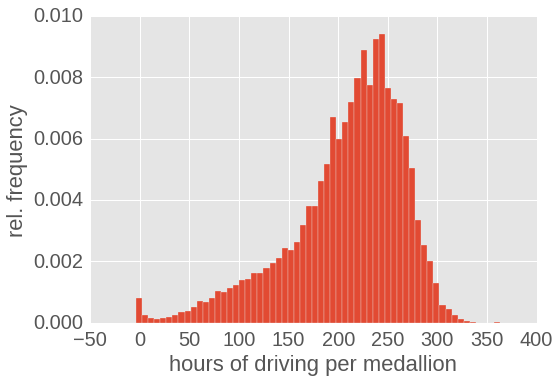

In [57]:
plt.hist(medallion_grouped.trip_duration.agg(np.sum).astype('timedelta64[h]'), range=[-10, 400], 
         bins=67, normed=True, stacked=True)
plt.xlabel('hours of driving per medallion')
plt.ylabel('rel. frequency')

Compare this to the data from trip_time_in_secs

(array([  0.00000000e+00,   7.66804853e-04,   2.79944629e-04,
          1.58229573e-04,   1.46058067e-04,   1.70401078e-04,
          1.82572584e-04,   2.43430112e-04,   3.40802157e-04,
          3.52973662e-04,   4.99031729e-04,   6.81604313e-04,
          7.30290336e-04,   8.03319369e-04,   1.08326400e-03,
          1.05892099e-03,   9.73720448e-04,   1.24149357e-03,
          1.39972314e-03,   1.38755164e-03,   1.66749627e-03,
          1.72835379e-03,   1.75269681e-03,   2.00829842e-03,
          2.19087101e-03,   2.08132746e-03,   2.36127209e-03,
          2.66555973e-03,   3.34716404e-03,   3.84619577e-03,
          3.85836727e-03,   4.72254417e-03,   5.35546246e-03,
          5.78146516e-03,   6.04923828e-03,   6.76735711e-03,
          7.30290336e-03,   8.26445230e-03,   8.98257113e-03,
          8.04536520e-03,   9.49377437e-03,   8.04536520e-03,
          8.14273724e-03,   7.43678992e-03,   7.27856035e-03,
          6.11009581e-03,   5.06334633e-03,   3.42019307e-03,
        

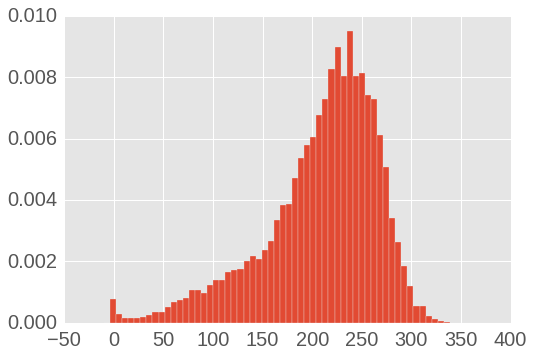

In [58]:
plt.hist(medallion_grouped.trip_time_in_secs.agg(np.sum)/3600, range=[-10, 400], 
         bins=67, normed=True, stacked=True, label='hours of driving')

Which medallions did how many drives? (the same functionality as with the group)

In [59]:
taxidata.medallion.value_counts()

2013000214    2137
2013001722    2112
2013009335    2039
2013000610    1959
2013005523    1957
2013009400    1941
2013001222    1893
2013004915    1886
2013005718    1882
2013008884    1882
2013008548    1881
2013006760    1870
2013004319    1869
2013002330    1869
2013007616    1866
2013000370    1866
2013004736    1862
2013004051    1860
2013000280    1858
2013000463    1856
2013011714    1855
2013000375    1852
2013010403    1847
2013000804    1847
2013006392    1844
2013000722    1843
2013004099    1841
2013007471    1838
2013008093    1835
2013006829    1833
              ... 
2013013374       1
2013013372       1
2013013401       1
2013013360       1
2013013367       1
2013013364       1
2013013425       1
2013012932       1
2013013387       1
2013013393       1
2013012812       1
2013013369       1
2013013376       1
2013013421       1
2013013264       1
2013013275       1
2013013409       1
2013013397       1
2013013334       1
2013013418       1
2013013095       1
2013013415  

How many medallions were active in this month?

In [60]:
taxidata.medallion.value_counts().size

13426

# <font color='blue'>Grouping of the hack_licenses</font>

In [61]:
hack_license_grouped = taxidata.groupby('hack_license')

In [62]:
hack_license_grouped.size() # already sorted

hack_license
2013000001     511
2013000002     332
2013000003     670
2013000004     655
2013000005     927
2013000006     439
2013000007     771
2013000008     782
2013000009     311
2013000010     648
2013000011     523
2013000012     661
2013000013     604
2013000014     680
2013000015     588
2013000016     528
2013000017    1018
2013000018     543
2013000019     438
2013000020     832
2013000021     565
2013000022     463
2013000023     396
2013000024     324
2013000025     430
2013000026     617
2013000027     562
2013000028     616
2013000029     123
2013000030     530
              ... 
2013032195       1
2013032196       9
2013032197       1
2013032198      18
2013032199      18
2013032200      18
2013032201      32
2013032202      29
2013032203      17
2013032204      25
2013032205      22
2013032206      24
2013032207      20
2013032208      23
2013032209      14
2013032210      26
2013032211      19
2013032212      10
2013032213      24
2013032214      22
2013032215      20

In [63]:
hack_license_grouped.size().describe()

count    32224.000000
mean       458.559304
std        223.725613
min          1.000000
25%        300.000000
50%        482.000000
75%        617.000000
max       1933.000000
dtype: float64

In [65]:
hack_license_summary = {}
for key, value in hack_license_grouped:
    hack_license_summary[key]= taxidata.loc[hack_license_grouped.groups[key]]['total_amount'].sum()

In [66]:
hack_license_summary_list = list(hack_license_summary.values())

In [67]:
hacksumdf = pd.DataFrame.from_dict(hack_license_summary, orient='index')

In [68]:
hacksumdf.head()

,0
2013003776,2990.65
2013003777,9506.24
2013003778,8111.38
2013003779,11712.36
2013003780,8860.36


In [70]:
hacksumdf.describe()

,0
count,32224.000000
mean,6398.271084
std,2928.515207
min,2.600000
25%,4587.935000
50%,6786.615000
75%,8425.967500
max,31918.100000


In [83]:
import _pickle as pickle
with open('hack_license_summary.p', 'wb') as fp:
    pickle.dump(hack_license_summary, fp)
#import json
#with open('hack_license_summary.json', 'w') as fp:
#    json.dump(hack_license_summary, fp)
# do not use json, this requires a string as a key

In [85]:
with open('medallion_summary.p', 'wb') as fp:
    pickle.dump(medallion_summary, fp)
#with open('medallion_summary.json', 'w') as fp:
#    json.dump(medallion_summary, fp)

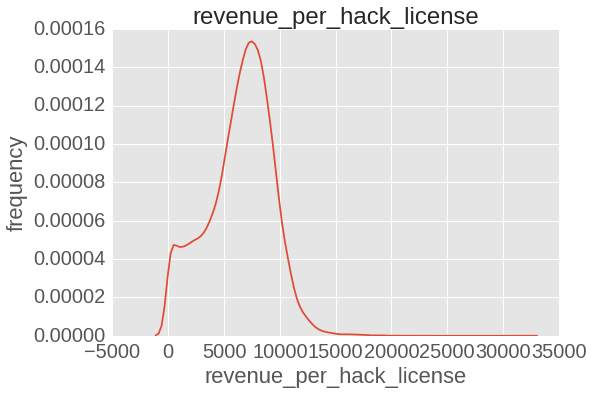

In [103]:
ax = sns.distplot(hacksumdf, hist=False, bins=20, kde=True);
ax.set(xlabel='revenue_per_hack_license', ylabel='frequency', title='revenue_per_hack_license')

In [106]:
fig = ax.get_figure()
fig.savefig('revenue_per_hack_license.svg')

# <font color='red'>TODO: Is this really correct?</font>

In [78]:
hack_lic = taxidata.hack_license.value_counts()

In [75]:
hack_lic = taxidata['hack_license']

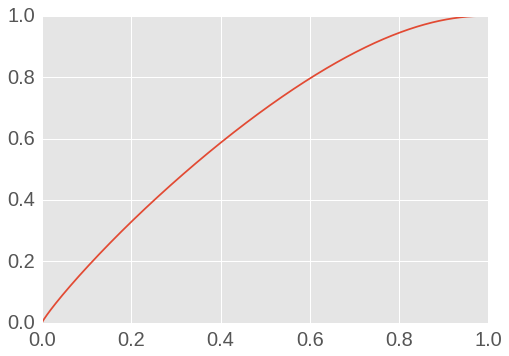

In [79]:
plt.plot(np.array(range(hack_lic.size))/hack_lic.size, np.cumsum(hack_lic)/hack_lic.sum() )

In [76]:
hack_lic/np.cumsum(hack_lic)

0           1.000000e+00
1           5.000000e-01
2           3.333333e-01
3           2.500000e-01
4           2.000000e-01
5           1.666667e-01
6           1.428571e-01
7           1.250000e-01
8           1.111111e-01
9           1.000000e-01
10          9.090909e-02
11          8.333333e-02
12          7.692308e-02
13          7.142857e-02
14          6.666667e-02
15          6.250000e-02
16          5.882353e-02
17          5.555556e-02
18          5.263158e-02
19          5.000000e-02
20          4.761905e-02
21          4.545455e-02
22          4.347826e-02
23          4.166667e-02
24          4.000000e-02
25          3.846154e-02
26          3.703704e-02
27          3.571429e-02
28          3.448276e-02
29          3.333333e-02
                ...     
14776585    6.767443e-08
14776586    6.767480e-08
14776587    6.767504e-08
14776588    6.767446e-08
14776589    6.767478e-08
14776590    6.767419e-08
14776591    6.767421e-08
14776592    6.767432e-08
14776593    6.767423e-08


# Create new feature: avg amount per mile

In [52]:
taxidata['avg_amount_per_mile'] = taxidata.total_amount / taxidata.trip_distance

In [53]:
taxidata.avg_amount_per_mile

0            5.456853
1            7.142857
2            4.945848
3            6.369048
4            4.975309
5            3.510747
6            6.685393
7            9.836066
8           12.000000
9            5.516014
10           3.741851
11           3.688029
12           4.415584
13           9.000000
14           4.605263
15           5.040323
16           6.630872
17           8.196721
18           3.365385
19          91.666667
20           7.086093
21           3.209621
22           4.940711
23          14.130435
24           6.197917
25           4.578755
26           5.405405
27           4.794521
28          57.692308
29          14.457831
              ...    
14776585     4.875000
14776586     7.500000
14776587     3.684211
14776588     3.773585
14776589     6.352941
14776590     4.300000
14776591     4.857143
14776592     4.677419
14776593     6.315789
14776594    10.000000
14776595     4.750000
14776596     4.193548
14776597    12.857143
14776598     5.416667
14776599  

In [54]:
#sns.distplot(taxidata.avg_amount_per_mile.dropna, kde=True)
taxidata.avg_amount_per_mile.describe()

count    1.477662e+07
mean              inf
std               NaN
min      3.003003e-02
25%      4.736842e+00
50%      6.000000e+00
75%      7.777778e+00
max               inf
Name: avg_amount_per_mile, dtype: float64

As you might see, there are some NaNs involved (divisions by 0)

In [55]:
taxidata.avg_amount_per_mile.count()

14776615

Surprisingly, I cannot find any NaN in the series....

In [56]:
taxidata.avg_amount_per_mile.dropna().describe()

count    1.477662e+07
mean              inf
std               NaN
min      3.003003e-02
25%      4.736842e+00
50%      6.000000e+00
75%      7.777778e+00
max               inf
Name: avg_amount_per_mile, dtype: float64

In [57]:
A = np.array(taxidata.avg_amount_per_mile)
maximum_indices = np.where(A==max(taxidata.avg_amount_per_mile))

In [58]:
maximum_indices

(array([     229,      230,      241, ..., 14776268, 14776326, 14776339]),)

In [59]:
taxidata.loc[maximum_indices]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount,trip_duration,avg_amount_per_mile
229,2013000230,2013000230,VTS,1,NaN,2013-01-01 00:02:00,2013-01-01 00:03:00,3,60,0.0,...,0.000000,0.000000,0.000000,CRD,2.50,0.5,0.25,3.75,00:01:00,inf
230,2013000231,2013000231,VTS,1,NaN,2013-01-01 00:02:00,2013-01-01 00:04:00,1,120,0.0,...,0.000000,0.000000,0.000000,CRD,4.25,0.0,0.00,4.25,00:02:00,inf
241,2013000242,2013000242,VTS,5,NaN,2013-01-01 00:02:00,2013-01-01 00:02:00,1,0,0.0,...,0.000000,0.000000,0.000000,CSH,27.00,0.0,0.00,27.50,00:00:00,inf
318,2013000319,2013000319,CMT,1,N,2013-01-01 00:02:06,2013-01-01 00:02:54,1,48,0.0,...,40.726269,-73.992226,40.725510,NOC,2.50,0.5,0.00,3.50,00:00:48,inf
361,2013000362,2013000362,CMT,0,NaN,2013-01-01 00:02:42,2013-01-01 00:02:50,1,8,0.0,...,40.644794,-73.781281,40.644878,NOC,20.00,0.5,0.00,20.50,00:00:08,inf
380,2013000381,2013000230,VTS,1,NaN,2013-01-01 00:03:00,2013-01-01 00:04:00,4,60,0.0,...,0.000000,0.000000,0.000000,CRD,3.00,0.5,0.07,4.07,00:01:00,inf
381,2013000382,2013000230,VTS,1,NaN,2013-01-01 00:03:00,2013-01-01 00:04:00,3,60,0.0,...,40.758369,-73.937607,40.758350,CRD,2.50,0.5,0.25,3.75,00:01:00,inf
431,2013000431,2013000429,VTS,1,NaN,2013-01-01 00:03:00,2013-01-01 00:04:00,2,60,0.0,...,40.721924,0.000000,0.000000,CSH,2.50,0.5,0.00,3.50,00:01:00,inf
461,2013000461,2013000459,VTS,1,NaN,2013-01-01 00:03:00,2013-01-01 00:04:00,5,60,0.0,...,40.751266,0.000000,0.000000,CSH,2.50,0.5,0.00,3.50,00:01:00,inf
574,2013000574,2013000230,VTS,1,NaN,2013-01-01 00:04:00,2013-01-01 00:06:00,5,120,0.0,...,40.705162,-73.802734,40.705162,CRD,3.00,0.5,0.45,4.45,00:02:00,inf


As one can see, there is quite a lot of invalid data!

In [60]:
taxidata.loc[maximum_indices].to_csv('drives_with_no_trip_distance_jan13.csv')

## Quickly check all the possibly invalid data

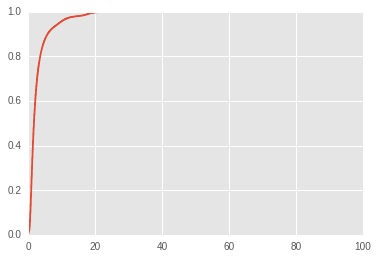

In [61]:
ecdf_trip_dist = ECDF(taxidata.trip_distance)

plt.step(ecdf_trip_dist.x, ecdf_trip_dist.y)

Clearly, the trigger for setting up the files is pickup_datetime

# <font color='red'>TODO: define, which data is valid. Simply drop all data that os zero? Search for patterns in this special data? Potential aim: fraud detection?</font>

In [68]:
taxidata.loc[taxidata['passenger_count'] == 0]['total_amount'].sum()

5593.23

A little bit disturbing.... 5600 bucks with no passengers inside. Let's take a closer look.

In [69]:
taxidata.loc[taxidata['passenger_count'] == 0]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount,trip_duration,avg_amount_per_mile
57884,2013002509,2013002506,VTS,5,NaN,2013-01-01 01:54:00,2013-01-01 01:54:00,0,0,0.00,...,0.000000,0.000000,0.000000,CRD,7.00,0.0,1.40,8.40,00:00:00,inf
133740,2013002260,2013002257,CMT,0,N,2013-01-01 05:00:46,2013-01-01 05:00:46,0,0,0.00,...,0.000000,0.000000,0.000000,CRD,8.00,0.0,0.00,8.00,00:00:00,inf
145617,2013006885,2013011071,VTS,5,NaN,2013-01-01 06:08:00,2013-01-01 06:08:00,0,0,0.07,...,0.000000,0.000000,0.000000,CRD,20.00,0.0,5.00,25.00,00:00:00,357.142857
146426,2013007515,2013007511,VTS,5,NaN,2013-01-01 06:14:00,2013-01-01 06:14:00,0,0,0.00,...,0.000000,0.000000,0.000000,CRD,11.00,0.0,0.00,11.00,00:00:00,inf
162774,2013006885,2013011071,VTS,5,NaN,2013-01-01 08:36:00,2013-01-01 08:36:00,0,0,0.00,...,0.000000,0.000000,0.000000,CRD,18.00,0.0,0.00,18.00,00:00:00,inf
262185,2013009849,2013013116,CMT,0,NaN,2013-01-01 15:16:04,2013-01-01 15:23:33,0,0,0.00,...,40.744038,NaN,NaN,CRD,10.80,0.0,0.00,10.80,00:07:29,inf
458008,2013009640,2013013792,VTS,5,NaN,2013-01-02 07:40:00,2013-01-02 07:56:00,0,960,6.00,...,40.710541,-74.026688,40.760536,CRD,50.00,0.0,4.00,64.25,00:16:00,10.708333
787295,2013001028,2013001025,CMT,0,NaN,2013-01-02 22:44:20,2013-01-03 00:44:20,0,0,0.00,...,40.671650,NaN,NaN,CRD,47.16,0.0,0.00,47.16,02:00:00,inf
966739,2013000677,2013014407,CMT,0,NaN,2013-01-03 12:27:06,2013-01-03 12:32:09,0,0,0.00,...,40.744186,NaN,NaN,CRD,5.50,0.0,0.00,5.50,00:05:03,inf
1026400,2013001209,2013001206,VTS,5,NaN,2013-01-03 15:05:00,2013-01-03 15:06:00,0,60,0.00,...,0.000000,0.000000,0.000000,CRD,9.00,0.0,0.00,9.00,00:01:00,inf


In [70]:
taxidata.loc[taxidata['trip_time_in_secs'] == 0]['total_amount'].describe() # big summary
# taxidata.loc[taxidata['trip_time_in_secs'] == 0]['total_amount'] # see the raw data

count    34185.000000
mean        31.009632
std         37.972177
min          2.500000
25%          3.500000
50%         10.500000
75%         58.000000
max        479.400000
Name: total_amount, dtype: float64

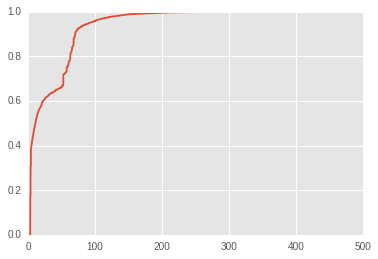

In [71]:
# plt.figure(figsize=(40,20))

e = ECDF(taxidata.loc[taxidata['trip_time_in_secs'] == 0]['total_amount'])
plt.plot(e.x, e.y)

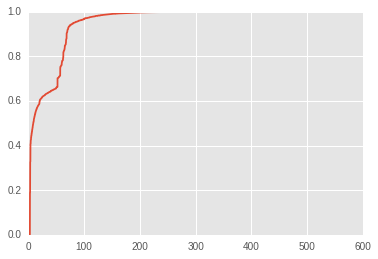

In [72]:
e = ECDF(taxidata.loc[taxidata['trip_distance'] == 0]['total_amount'])
plt.plot(e.x, e.y)

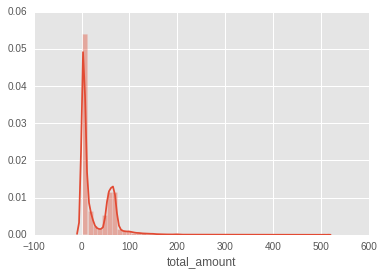

In [73]:
sns.distplot(taxidata.loc[taxidata.trip_distance==0]['total_amount'].dropna())

<font color='red'>Ok, and what's now the benefit of that? </font>

In [74]:
taxidata.loc[(taxidata['trip_time_in_secs'] == 0) & (taxidata['trip_distance']==0)]['total_amount'].describe()

count    24442.000000
mean        36.269236
std         40.015578
min          2.500000
25%          4.000000
50%         18.725000
75%         62.900000
max        479.400000
Name: total_amount, dtype: float64

In [75]:
taxidata.loc[(taxidata['trip_time_in_secs'] == 0) & (taxidata['trip_distance']==0)]['total_amount'].sum()

886492.6700000113

What has happenend with the really small values?

# <font color = 'red'> tbc.... </font>